# Plot Impact over Rank
Plot the relationship between the average impact of a model parameter and the average/median rank 
or its probability of a high rank over all trajectories.
You may split the dataset based on the flow (inflow, ascent, and outflow) and phases (warm, mixed, and cold phase).

In [5]:
import panel as pn
import xarray as xr

from ad_sensitivity_analysis.interactive.rank import plot_rank_over_impact_interactive, plot_rank_probs_interactive
from ad_sensitivity_analysis.interactive.stats_per_traj import plot_kde_histogram_interactive

pn.extension()

## Creating/Loading the Dataset
You may use the following cell to create the dataset and save it to disk or the cell after that to load the data.

In [2]:
from ad_sensitivity_analysis.statistics.stats_per_traj import create_rank_traj_dataset

file_path = "data/simulation/"  # Path to the sensitivity simulation
# A list of parameters of interest. 
# Here, we stick to those with the largest gradients.
model_params = [
    'dT_mult_min',
    'da_HET',
    'da_prime',
    'da_v',
    'db_prime',
    'db_v',
    'dc_prime',
    'dcloud_max_x',
    'dg_ccn_1',
    'dg_ccn_2',
    'dgraupel_a_geo',
    'dgraupel_b_geo',
    'dgraupel_b_vel',
    'dh_ccn_1',
    'dhande_ccn_fac',
    'di_ccn_1',
    'dice_a_geo',
    'dice_b_geo',
    'dice_b_vel',
    'dk_1_conv',
    'dk_2_conv',
    'dk_r',
    'dkc_autocon',
    'dkin_visc_air',
    'dp_sat_melt',
    'drain_a_geo',
    'drain_b_geo',
    'drain_b_vel',
    'drain_cmu3',
    'drain_mu',
    'drain_nu',
    'dsnow_b_geo',
]
# Time steps before and after
# the ascent to consider for the 
# rank calculation. Since the 
# trajectories have a time step
# of 30 seconds, a value of 240 
# corresponds to two hours.
inoutflow_time = 240
ds = create_rank_traj_dataset(
    file_path=file_path,
    inoutflow_time=inoutflow_time,
    model_params=model_params,
)
ds

You may store the dataset to disk

In [ ]:
comp = {"zlib": True, "complevel": 9}
encoding = {var: comp for var in ds.data_vars}
ds.to_netcdf(
    path="data/statistics/rank_per_traj.nc",
    encoding=encoding,
    compute=True,
    engine="netcdf4",
    format="NETCDF4",
    mode="w",
)

In [2]:
ds = xr.open_dataset("data/statistics/rank_per_traj.nc", decode_times=False, engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:              (Output Parameter: 3, file: 45, trajectory: 1113,
                          phase: 5, flow: 4)
Coordinates:
  * Output Parameter     (Output Parameter) object 'QV' ... 'latent_cool'
  * file                 (file) object 'Z2_wcb_trajs_20161003_23.nc' ... 'Z2_...
  * trajectory           (trajectory) int64 0 1 2 3 4 ... 1109 1110 1111 1112
  * phase                (phase) object 'warm phase' 'mixed phase' ... 'any'
  * flow                 (flow) object 'inflow' 'ascent' 'outflow' 'any'
Data variables: (12/62)
    db_ccn_1 rank        (Output Parameter, file, trajectory, phase, flow) float64 ...
    db_ccn_2 rank        (Output Parameter, file, trajectory, phase, flow) float64 ...
    db_ccn_3 rank        (Output Parameter, file, trajectory, phase, flow) float64 ...
    db_v rank            (Output Parameter, file, trajectory, phase, flow) float64 ...
    dc_ccn_1 rank        (Output Parameter, file, trajectory, phase, flow) float64 ...
    dc_ccn_2 rank        (Output Parameter, file, trajectory, phase, flow) float64 ...
    ...                   ...
    drain_nu avg         (Output Parameter, file, trajectory, phase, flow) float64 ...
    dsnow_b_geo avg      (Output Parameter, file, trajectory, phase, flow) float64 ...
    lon                  (file, trajectory) float64 ...
    lat                  (file, trajectory) float64 ...
    avg ascent           (file, trajectory, phase) float64 ...
    asc600 step count    (file, trajectory, phase) float64 ...

## Compare impact and median/average rank

Column
    [0] Row
        [0] IntSlider(end=15, name='Width in inches', start=3, value=9)
        [1] IntSlider(end=15, name='Height in inches', start=3, value=6)
        [2] IntSlider(end=500, name='Dot size', start=1, step=2, value=6)
    [1] Row
        [0] Toggle(button_type='success', name='Show phases')
        [1] Toggle(button_type='success', name='Show flow')
        [2] Toggle(button_type='success', name='Adjust for Colorblind', value=True)
    [2] Row
        [0] FloatSlider(end=5, name='Scale fontsize', start=0.2, value=0.7)
        [1] Toggle(button_type='success', name='Log y-axis')
        [2] Toggle(button_type='success', name='Average over a..., value=True)
    [3] Row
        [0] TextInput(value='Path/to/store/plot.png')
        [1] Button(button_type='primary', name='Save Plot')
        [2] Toggle(button_type='success', name='Latexify')
    [4] Row
        [0] Select(name='Output Parameter', options=['QV', 'latent_heat', ...], value='QV')
        [1] TextInput(name='Title')
    [5] ParamFunction(function)
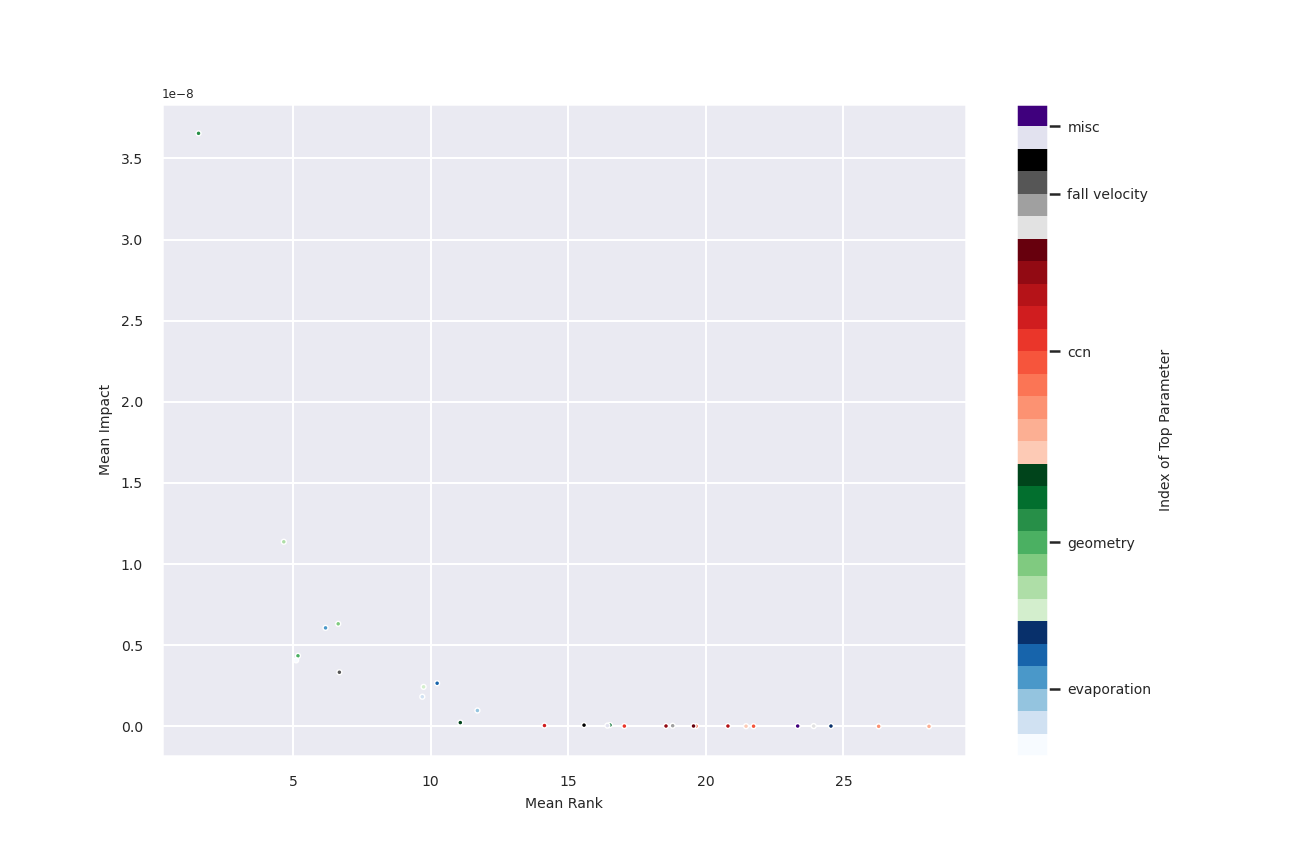

In [3]:
plot_rank_over_impact_interactive(ds)

## Compare impact and probability of high ranking

Column
    [0] Row
        [0] IntSlider(end=15, name='Width in inches', start=3, value=9)
        [1] IntSlider(end=15, name='Height in inches', start=3, value=6)
    [1] Row
        [0] Toggle(button_type='success', name='Adjust for colorblind', value=True)
        [1] Toggle(button_type='success', name='Show colorbar', value=True)
    [2] Row
        [0] TextInput(value='Path/to/store/plot.png')
        [1] Button(button_type='primary', name='Save Plot')
        [2] Toggle(button_type='success', name='Latexify')
    [3] Row
        [0] Select(name='Flow', options=['inflow', 'ascent', ...], value='inflow')
        [1] Select(name='Phase', options=['warm phase', ...], value='warm phase')
        [2] Select(name='Output Parameter', options=['QV', 'latent_heat', ...], value='QV')
    [4] Row
        [0] Toggle(button_type='success', name='Show median i..., value=True)
        [1] Toggle(button_type='success', name='Show rank instead o...)
        [2] Toggle(button_type='success', name='Use log y-axis')
    [5] Row
        [0] IntSlider(end=38, name='Color the top n..., start=1, value=10)
        [1] FloatSlider(end=5, name='Scale fontsize', start=0.2, value=0.7)
        [2] IntSlider(end=500, name='Change the dot size', start=1, step=2, value=12)
    [6] ParamFunction(function)
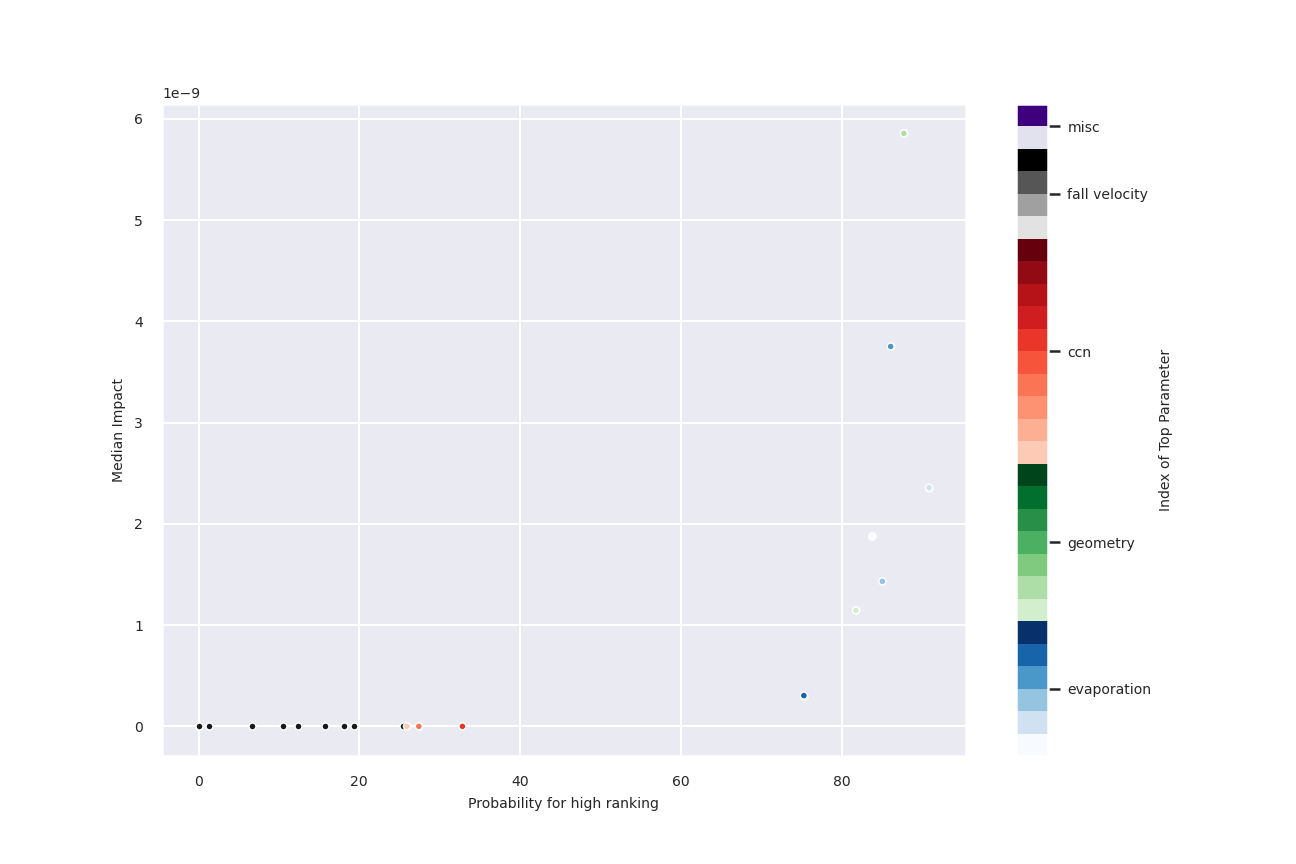

<Figure size 648x432 with 0 Axes>

In [3]:
plot_rank_probs_interactive(ds)

## Compare impact and probability of high ranking as KDE

Column
    [0] Row
        [0] IntSlider(end=15, name='Width in inches', start=3, value=9)
        [1] IntSlider(end=15, name='Height in inches', start=3, value=9)
        [2] FloatSlider(end=5, name='Scale fontsize', start=0.2, value=0.7)
    [1] Row
        [0] TextInput(value='Path/to/store/plot.png')
        [1] Button(button_type='primary', name='Save Plot')
        [2] Toggle(button_type='success', name='Latexify')
    [2] Row
        [0] Toggle(button_type='success', name='Show flow')
        [1] Toggle(button_type='success', name='Show phase')
        [2] Toggle(button_type='success', name='Ignore zero gradients')
    [3] Row
        [0] CrossSelector(name='Parameter', options=['db_ccn_1 rank', ...], value=['db_ccn_1 rank', ...])
        [1] Column
            [0] Select(name='Output Parameter', options=['QV', 'latent_heat', ...], value='QV')
            [1] Toggle(button_type='success', name='Common norm')
    [4] Row
        [0] FloatSlider(end=10, name='Change the line width', start=1, step=0.5, value=2)
        [1] FloatSlider(end=1.5, name='Change the bandwidth f..., start=0.05, step=0.05, value=1.0)
        [2] TextInput(name='Title')
    [5] ParamFunction(function)
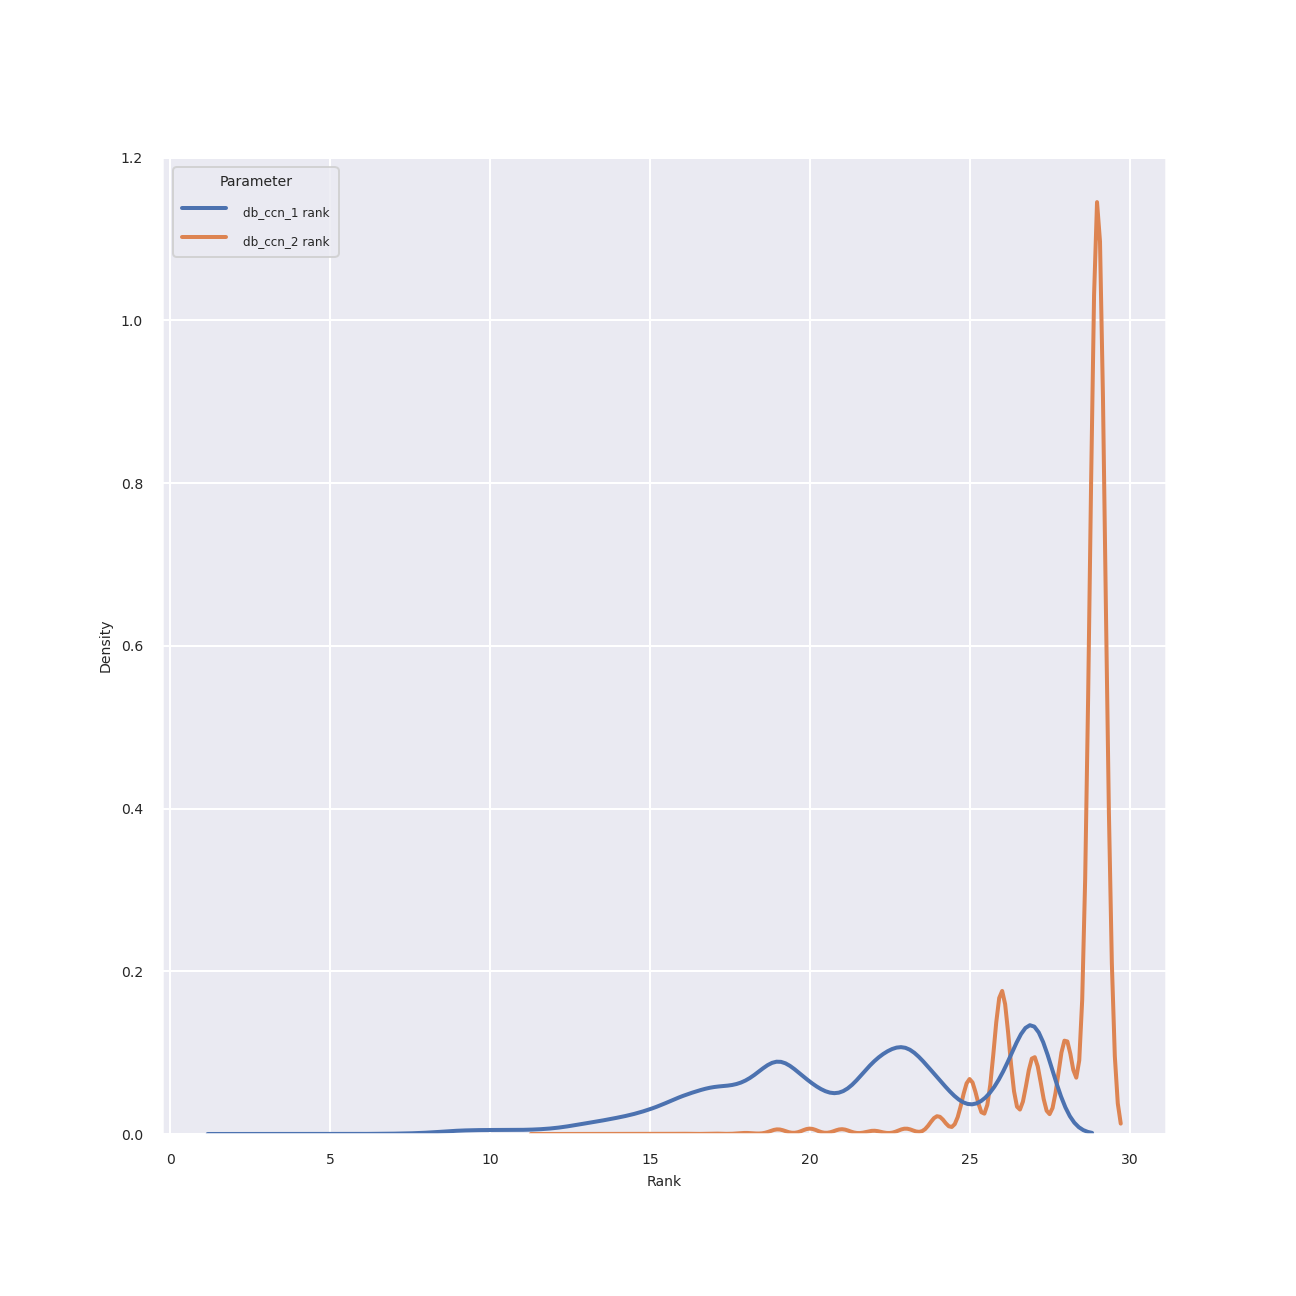

<Figure size 648x648 with 0 Axes>

In [6]:
plot_kde_histogram_interactive(ds)